# Task 1 Notebook (Iris)
## Introduction
In this notebook, we'll be working with the unemployment dataset. We will do explanatory data analysis to understand the data, and derive insights to understand how unemployment was affected with the Corona pandemic in India. The data is split into 2 datasets, so we'll start with the first, then work on the second which offers some more geographic information.
### First Unemployment dataset
1. Importing packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

2. Importing and manipulating data

In [4]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\Unemployment in India.csv")
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.head()

Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2019-05-31   Monthly                             3.65   
1  Andhra Pradesh 2019-06-30   Monthly                             3.05   
2  Andhra Pradesh 2019-07-31   Monthly                             3.75   
3  Andhra Pradesh 2019-08-31   Monthly                             3.32   
4  Andhra Pradesh 2019-09-30   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural

3. Checking data info. This helps ensures data types and missing values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB


We can see that there are 28 missing values in all the the columns which suggest there are just some rows that contain no data. We can show this assumption, then drop missing values.

In [8]:
missing_data = df[df.isna().any(axis=1)]
missing_data

Region Date Frequency  Estimated Unemployment Rate (%)  \
359    NaN  NaT       NaN                              NaN   
360    NaN  NaT       NaN                              NaN   
361    NaN  NaT       NaN                              NaN   
362    NaN  NaT       NaN                              NaN   
363    NaN  NaT       NaN                              NaN   
364    NaN  NaT       NaN                              NaN   
365    NaN  NaT       NaN                              NaN   
366    NaN  NaT       NaN                              NaN   
367    NaN  NaT       NaN                              NaN   
368    NaN  NaT       NaN                              NaN   
369    NaN  NaT       NaN                              NaN   
370    NaN  NaT       NaN                              NaN   
371    NaN  NaT       NaN                              NaN   
372    NaN  NaT       NaN                              NaN   
754    NaN  NaT       NaN                              NaN   
755    NaN  NaT       NaN                              NaN   
756    NaN  NaT       NaN                              NaN   
757    NaN  NaT       NaN                              NaN   
758    NaN  NaT       NaN                              NaN   
759    NaN  NaT       NaN                              NaN   
760    NaN  NaT       NaN                              NaN   
761    NaN  NaT       NaN                              NaN   
762    NaN  NaT       NaN                              NaN   
763    NaN  NaT       NaN                              NaN   
764    NaN  NaT       NaN                              NaN   
765    NaN  NaT       NaN                              NaN   
766    NaN  NaT       NaN                              NaN   
767    NaN  NaT       NaN                              NaN   

     Estimated Employed  Estimated Labour Participation Rate (%) Area  
359                 NaN                                      NaN  NaN  
360                 NaN                                      NaN  NaN  
361                 NaN                                      NaN  NaN  
362                 NaN                                      NaN  NaN  
363                 NaN                                      NaN  NaN  
364                 NaN                                      NaN  NaN  
365                 NaN                                      NaN  NaN  
366                 NaN                                      NaN  NaN  
367                 NaN                                      NaN  NaN  
368                 NaN                                      NaN  NaN  
369                 NaN                                      NaN  NaN  
370                 NaN                                      NaN  NaN  
371                 NaN                                      NaN  NaN  
372                 NaN                                      NaN  NaN  
754                 NaN                                      NaN  NaN  
755                 NaN                                      NaN  NaN  
756                 NaN                                      NaN  NaN  
757                 NaN                                      NaN  NaN  
758                 NaN                                      NaN  NaN  
759                 NaN                                      NaN  NaN  
760                 NaN                                      NaN  NaN  
761                 NaN                                      NaN  NaN  
762                 NaN                                      NaN  NaN  
763                 NaN                                      NaN  NaN  
764                 NaN                                      NaN  NaN  
765                 NaN                                      NaN  NaN  
766                 NaN                                      NaN  NaN  
767                 NaN                                      NaN  NaN

As you can see there are just rows that hold no information, so we can simply drop them all.

In [10]:
df.dropna(inplace=True)
df.isna().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

4. Checking for any duplicate rows.

In [12]:
df.duplicated().sum()

0

5. Showing some data statistics with the describe method

In [14]:
df.describe()

Date  Estimated Unemployment Rate (%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       Estimated Employed  Estimated Labour Participation Rate (%)  
count        7.400000e+02                               740.000000  
mean         7.204460e+06                                42.630122  
min          4.942000e+04                                13.330000  
25%          1.190404e+06                                38.062500  
50%          4.744178e+06                                41.160000  
75%          1.127549e+07                                45.505000  
max          4.577751e+07                                72.570000  
std          8.087988e+06                                 8.111094

6. Plotting a pairplot that shows the relationship between different features, in addition to the distribution of each feature on the diagonal axis.

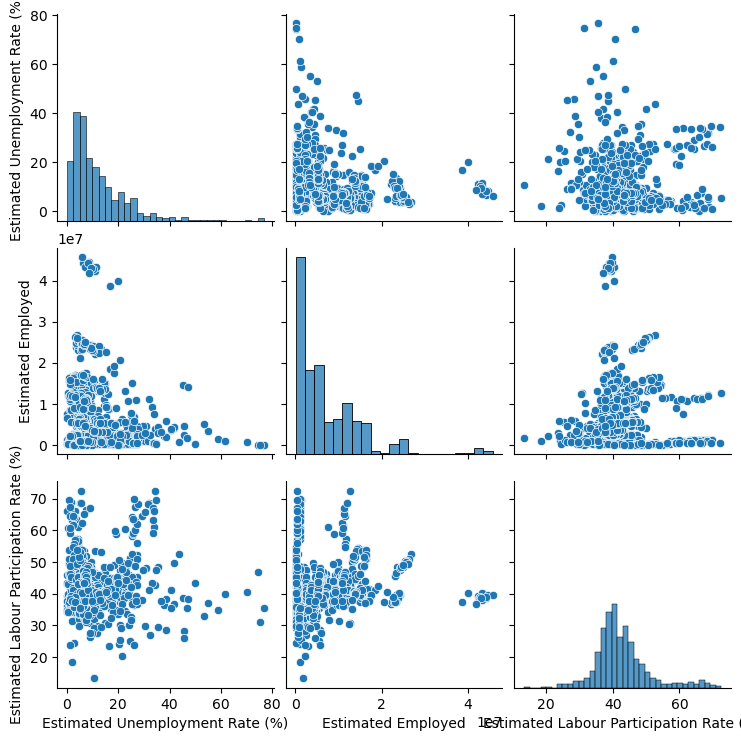

In [16]:
sns.pairplot(df)
plt.show()

7. Plotting a heatmap of the correlation matrix between the features.

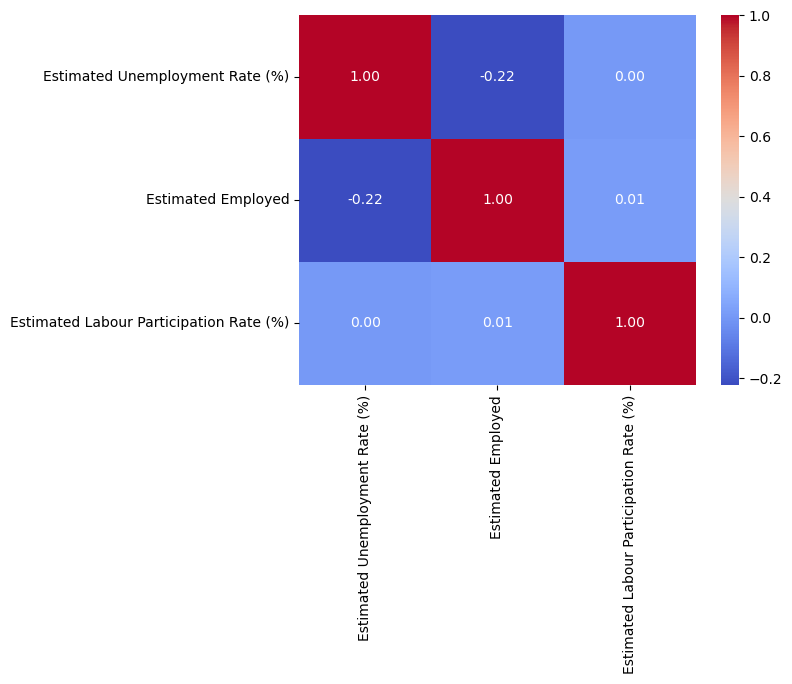

In [18]:
correlation_matrix = df.select_dtypes('number').corr()
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

The correlation between features is too low. However, we can see a little negative correlation between the ***Estimated Unemployment Rate*** and ***Estimated Employed***, which can be sensible since as the unemployment rate increases, the number of workers decreases.
___

8. This figure shows how the unemployment rate varies by region, with a boxplot on the left, and a barplot on the right that shows the mean umemployment rate by region in increasing order.

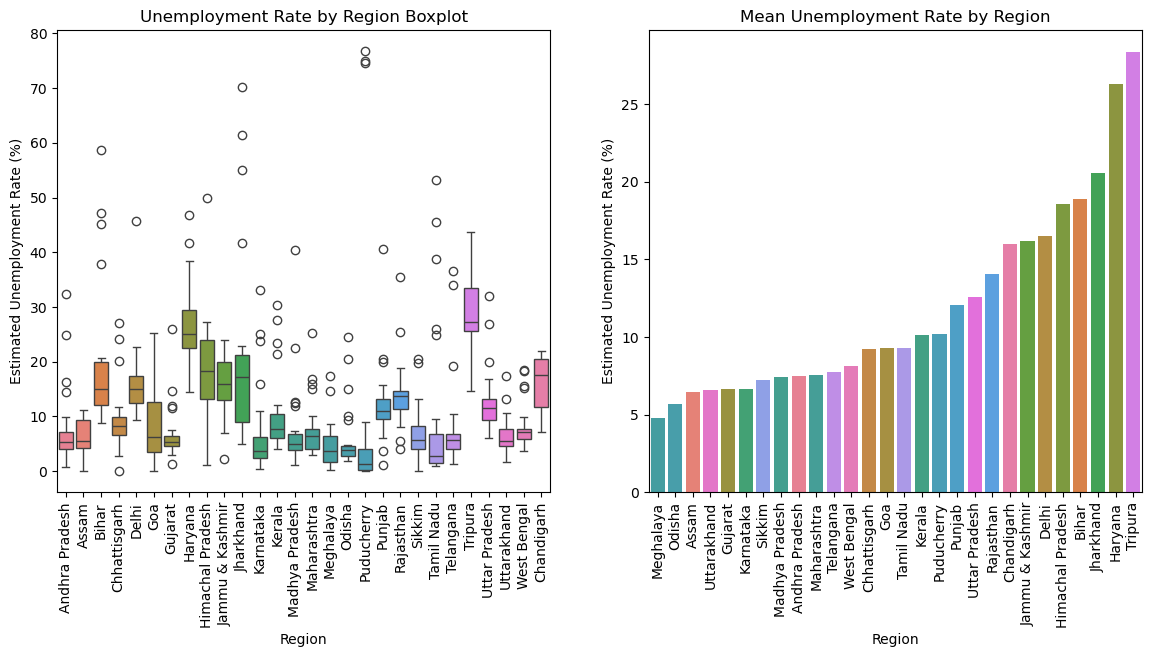

In [21]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='Region', y='Estimated Unemployment Rate (%)', hue='Region')
plt.xticks(rotation='vertical')
plt.title('Unemployment Rate by Region Boxplot')

plt.subplot(1,2,2)
unemp_order = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values().index
sns.barplot(data=df, x='Region', y='Estimated Unemployment Rate (%)', hue='Region',
            order=unemp_order, errorbar=None)
plt.xticks(rotation='vertical')
plt.title('Mean Unemployment Rate by Region')
plt.show()

**Insights**: 
- We can see through the bar plot that nearly half the regions have an average umeployment rate below 10%. However, the ouliers in the boxplot show that at a certain time, the unemployment rate went up significantly in many regions. This can mainly be in the Corona lockdown stage.
- The top 5 regions with the highest average unemployment rate are: Tripura, Haryana, Jharkhand, Bihar, and Himachal Pradesh.
___
9. This circular plot shows the distribution of the unemployment rate by area and region.

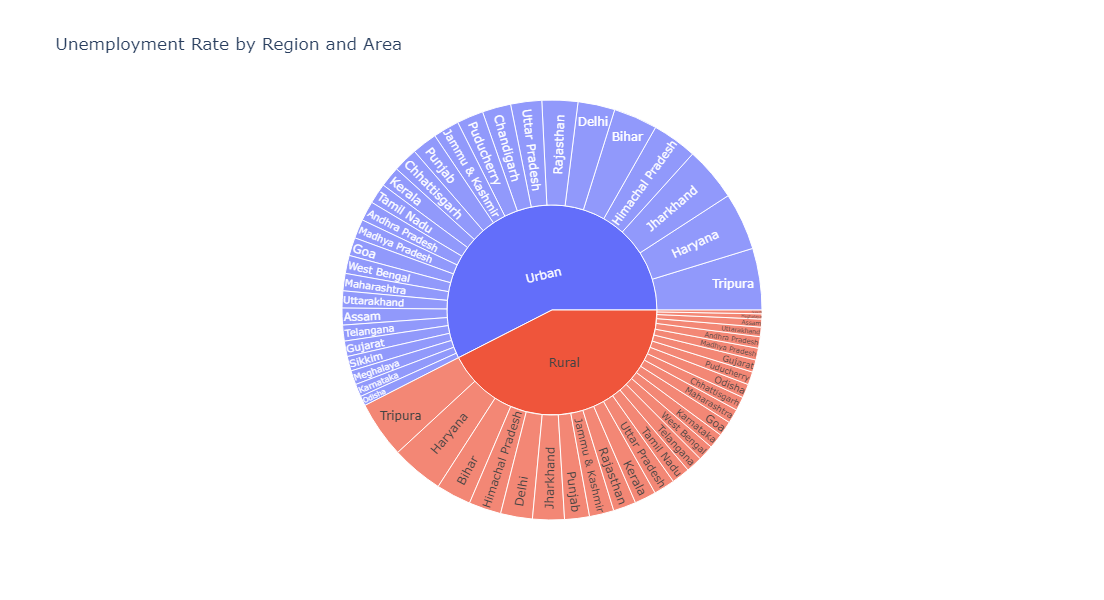

In [23]:
fig = px.sunburst(df, path=['Area', 'Region'], values='Estimated Unemployment Rate (%)',
                  title='Unemployment Rate by Region and Area', width=600, height=600)
fig.show()

**Insights**: 
- This sunburst plot shows that the unemployment rate is higher in the urban area. This is logical since jobs are concentrated in the urban area.
- The top 5 regions with the highest unemployment rate are: Tripura, Haryana, Jharkhand, Bihar, and Himachal Pradesh.
___
10. This visualization is a line plot that shows how all the features varied by time. The number of estimated workers is shown on a different plot on the right since it has an incredibly larger scale than the other features.

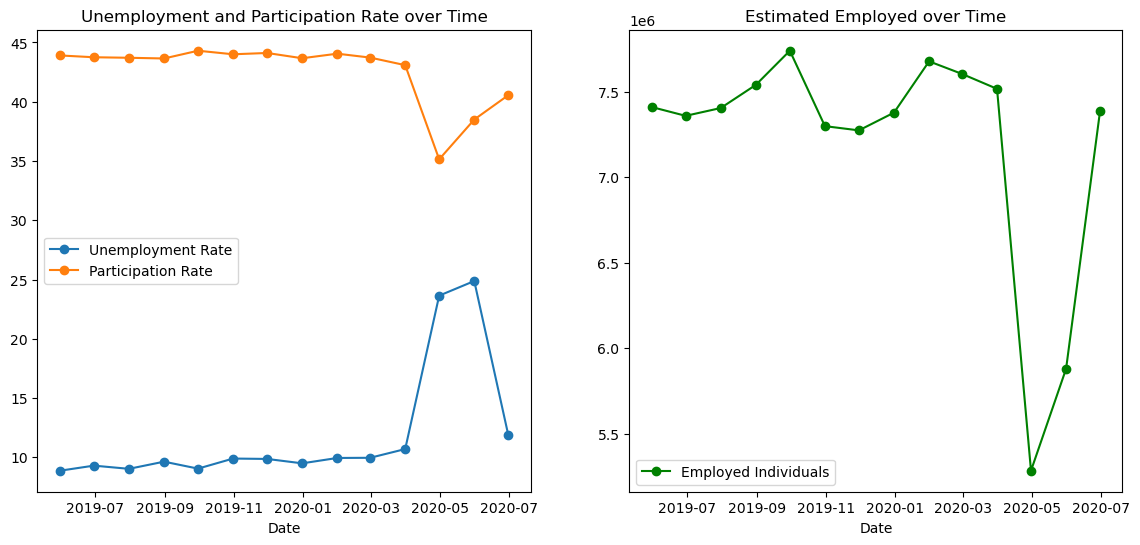

In [25]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
unemp_date = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
plt.plot(unemp_date.index, unemp_date.values, marker='o', label='Unemployment Rate')
active = df.groupby('Date')['Estimated Labour Participation Rate (%)'].mean()
plt.plot(active.index, active.values, marker='o', label='Participation Rate')
plt.xlabel('Date')
plt.title('Unemployment and Participation Rate over Time')
plt.legend()
plt.subplot(1,2,2)
emp_date = df.groupby('Date')['Estimated Employed'].mean()
plt.plot(emp_date.index, emp_date.values, marker='o', c='g', label='Employed Individuals')
plt.xlabel('Date')
plt.title('Estimated Employed over Time')
plt.legend()
plt.show()

**Insights**: 
- We can clearly see through these plots the effect of the lockdown on the features. Between April and July in 2020, the unemployment rate in India jumped from 10% up to 25% on average.
- On the other hand, as expected, the participation rate went down from 43% to 35%. Similarly, the estimated number of employed individuals dipped below 5.5 million during the lockdown period.
___
11. This is a plot that focuses more on variation of the unemployment rate over time with a box plot, instead of just the average.

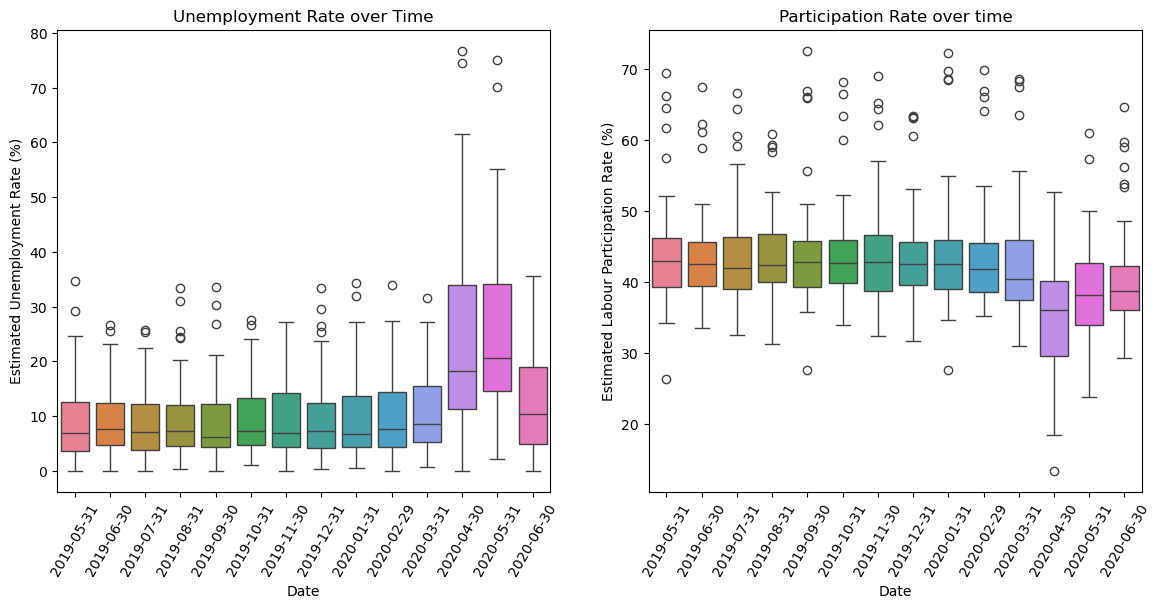

In [27]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Date')
plt.title('Unemployment Rate over Time')
plt.xticks(rotation=60)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Date', y='Estimated Labour Participation Rate (%)', hue='Date')
plt.xticks(rotation=60)
plt.title('Participation Rate over time')
plt.show()

**Insights**: 
- The ***unemployment rate*** boxplot better explains how the unemployment rate was affected during lockdown.
- Before lockdown, the unemployment rate had a median below 10%, and a moderate distribution.
- During lockdown, the median went up to 20%, which is higher than the 75% quantile before lockdown. The distribution also increased, with some extreme values (ouliers) reaching as high as nearly 80%.
- The ***participation rate*** had a median of 45% before lockdown, which decreased to 37% after lockdown.
- This can be explained by the fact that many workers left the labor market during lockdown due to economy shutdown and health concerns.
___

### Second Unemployment dataset
This dataset has similar information as the first dataset. However, the area column here splits data into cardinal directions (north, south...), instead of urban and rural.

In addition, this dataset contains 2 columns that store the latitude and longitude of the region, which means we can draw a map that shows how the unemployment rate was affected by region. However, the latitude and longitude columns were wrongly swapped in the original dataset, so I had to swap them to correct the data. (This is something I noticed when examining the describe() method and later when plotting the map.

1. Importing and manipulating data

In [30]:
df2 = pd.read_csv(r"C:\Users\Admin\Downloads\Unemployment_Rate_upto_11_2020.csv")
df2.columns = df2.columns.str.strip()
df2 = df2.rename(columns={'Region.1':'Area','longitude':'latitude','latitude':'longitude'})
df2['Date'] = pd.to_datetime(df2['Date'],dayfirst=True)
df2.head()

Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2020-01-31         M                             5.48   
1  Andhra Pradesh 2020-02-29         M                             5.83   
2  Andhra Pradesh 2020-03-31         M                             5.79   
3  Andhra Pradesh 2020-04-30         M                            20.51   
4  Andhra Pradesh 2020-05-31         M                            17.43   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  \
0            16635535                                    41.02  South   
1            16545652                                    40.90  South   
2            15881197                                    39.18  South   
3            11336911                                    33.10  South   
4            12988845                                    36.46  South   

   latitude  longitude  
0   15.9129      79.74  
1   15.9129      79.74  
2   15.9129      79.74  
3   15.9129      79.74  
4   15.9129      79.74

2. Checking data info. This helps ensures data types and missing values.

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   267 non-null    object        
 1   Date                                     267 non-null    datetime64[ns]
 2   Frequency                                267 non-null    object        
 3   Estimated Unemployment Rate (%)          267 non-null    float64       
 4   Estimated Employed                       267 non-null    int64         
 5   Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   Area                                     267 non-null    object        
 7   latitude                                 267 non-null    float64       
 8   longitude                                267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), 

We can see that data types are correct. In adddition, all columns contain 267 non-null data, which means there are no missing values since there are 267 entries.

3. Checking for any duplicate rows.

In [35]:
df2.duplicated().sum()

0

4. Showing some data statistics with the describe method.

In [37]:
df2.describe()

Date  Estimated Unemployment Rate (%)  \
count                            267                       267.000000   
mean   2020-06-16 09:15:30.337078528                        12.236929   
min              2020-01-31 00:00:00                         0.500000   
25%              2020-03-31 00:00:00                         4.845000   
50%              2020-06-30 00:00:00                         9.650000   
75%              2020-08-31 00:00:00                        16.755000   
max              2020-10-31 00:00:00                        75.850000   
std                              NaN                        10.803283   

       Estimated Employed  Estimated Labour Participation Rate (%)  \
count        2.670000e+02                               267.000000   
mean         1.396211e+07                                41.681573   
min          1.175420e+05                                16.770000   
25%          2.838930e+06                                37.265000   
50%          9.732417e+06                                40.390000   
75%          2.187869e+07                                44.055000   
max          5.943376e+07                                69.690000   
std          1.336632e+07                                 7.845419   

         latitude   longitude  
count  267.000000  267.000000  
mean    22.826048   80.532425  
min     10.850500   71.192400  
25%     18.112400   76.085600  
50%     23.610200   79.019300  
75%     27.278400   85.279900  
max     33.778200   92.937600  
std      6.270731    5.831738

5. Plotting a pairplot that shows the relationship between different features, in addition to the distribution of each feature on the diagonal axis

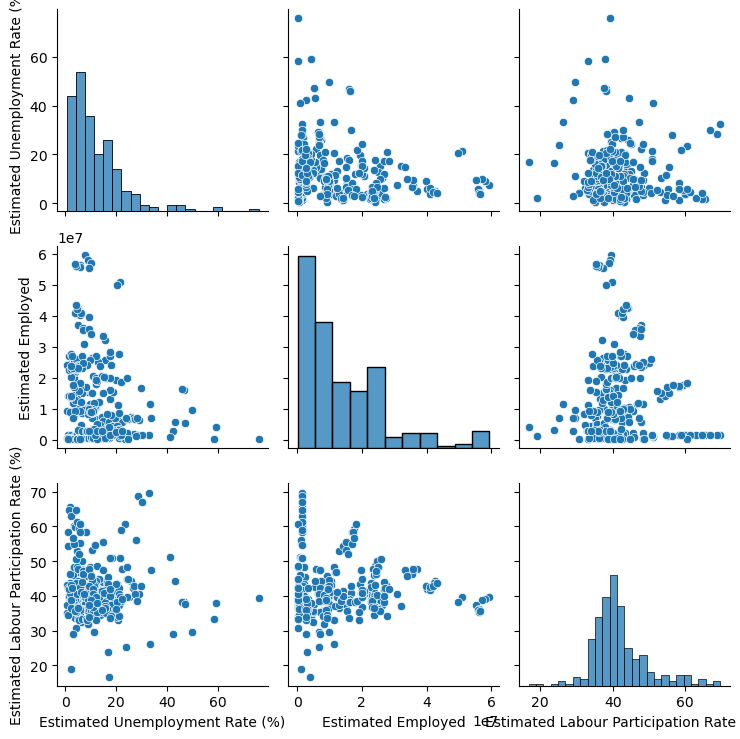

In [39]:
emp_cols = ['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']
sns.pairplot(df2[emp_cols])
plt.tight_layout()
plt.show()

6. Plotting a heatmap of the correlation matrix between the features.

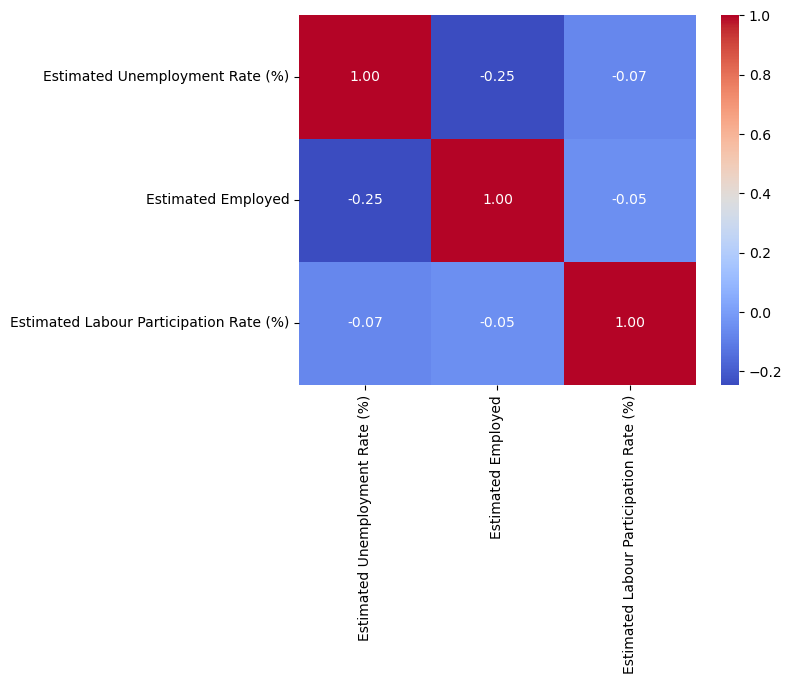

In [41]:
correlation_matrix = df2[emp_cols].corr()
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

- The function below plots a boxplot on the left and a barplot on the right (in increasing order) for a data feature in relation to the different regions.

In [43]:
def boxplot_barplot(df, col):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x='Region', y=col, hue='Region')
    plt.title(f'{col} by Region')
    plt.xticks(rotation='vertical')

    plt.subplot(1,2,2)
    ordered_stats = df.groupby('Region')[col].mean().sort_values().reset_index()
    sns.barplot(data=ordered_stats, x='Region', y=col, hue=col, errorbar=None)
    plt.title(f'{col} by Region')
    plt.xticks(rotation='vertical')
    plt.legend([], [], frameon=False)
    plt.show()

7. This is a visualization of unemployment rate by region.

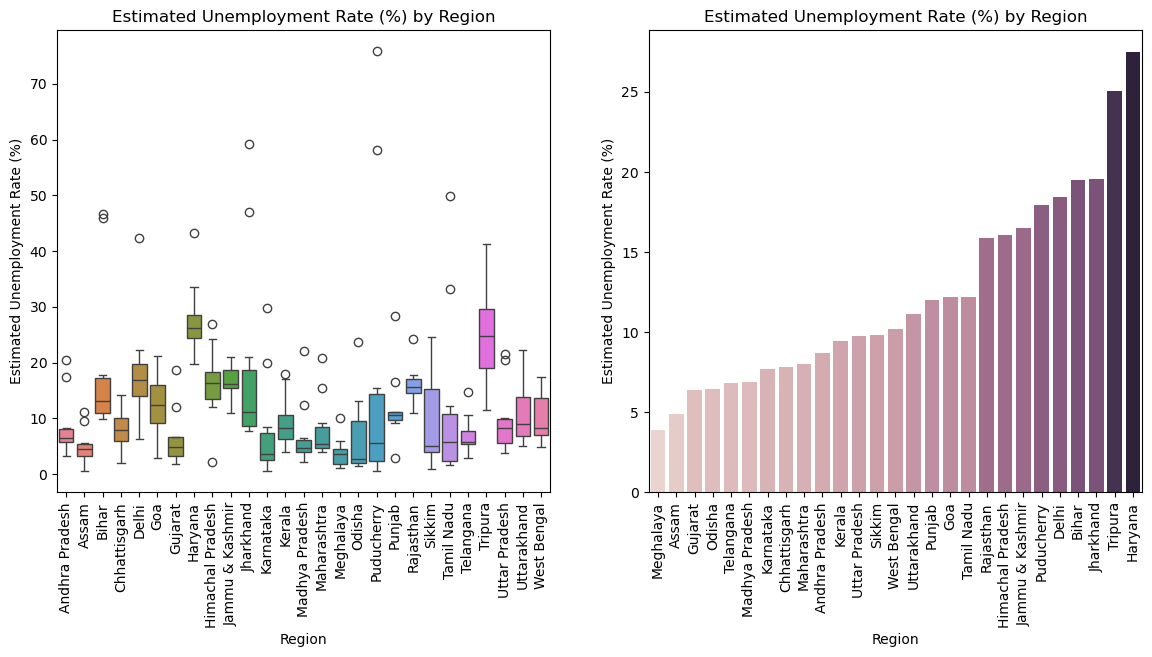

In [45]:
boxplot_barplot(df2, emp_cols[0])

**Insights**:
- We can see through the bar plot that nearly half the regions have an average umeployment rate below 10%. However, the ouliers in the boxplot show that at a certain time, the unemployment rate went up significantly in many regions. This can mainly be in the Corona lockdown stage.
- The top 5 regions with the highest average unemployment rate are: Haryana, Tripura, Jharkhand, Bihar, and Puducherry.
___

8. This is a visualization of participation rate by region.

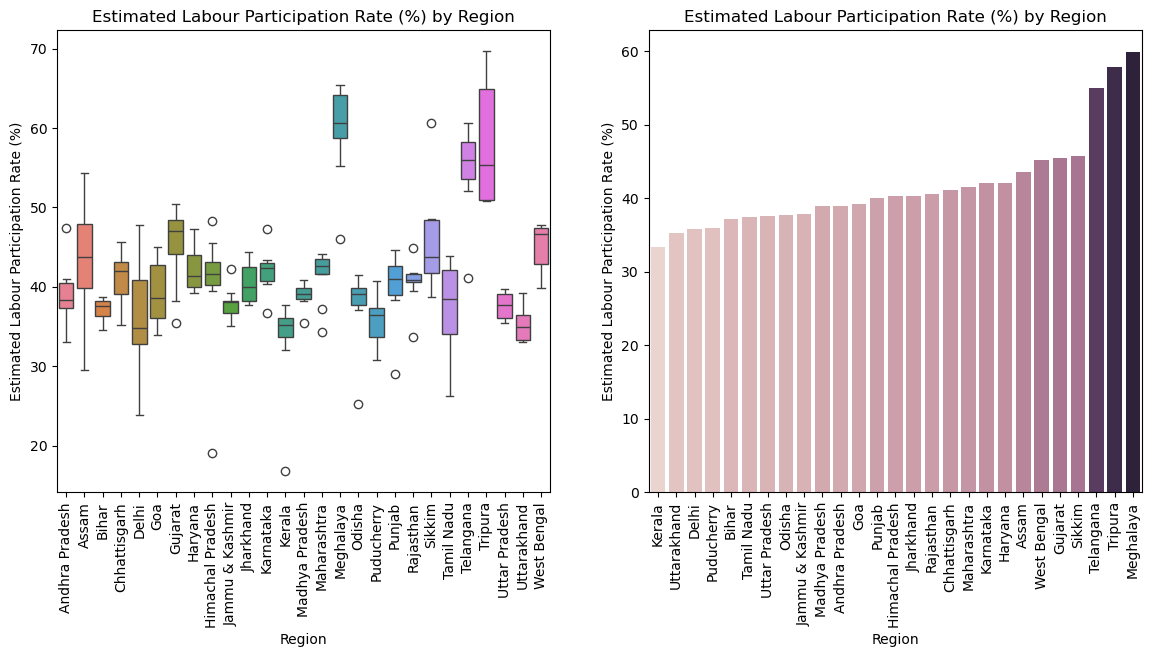

In [48]:
boxplot_barplot(df2, emp_cols[2])

**Insights**:
- We can that the average paricipation rate is ~40%.
- Meghalaya, Tripura, and Telangana are the regions with the highest participation rate.
___

9. This visualization is a line plot that shows how all the features varied by time. The number of estimated workers is shown on a different plot on the right since it has an incredibly larger scale than the other features.

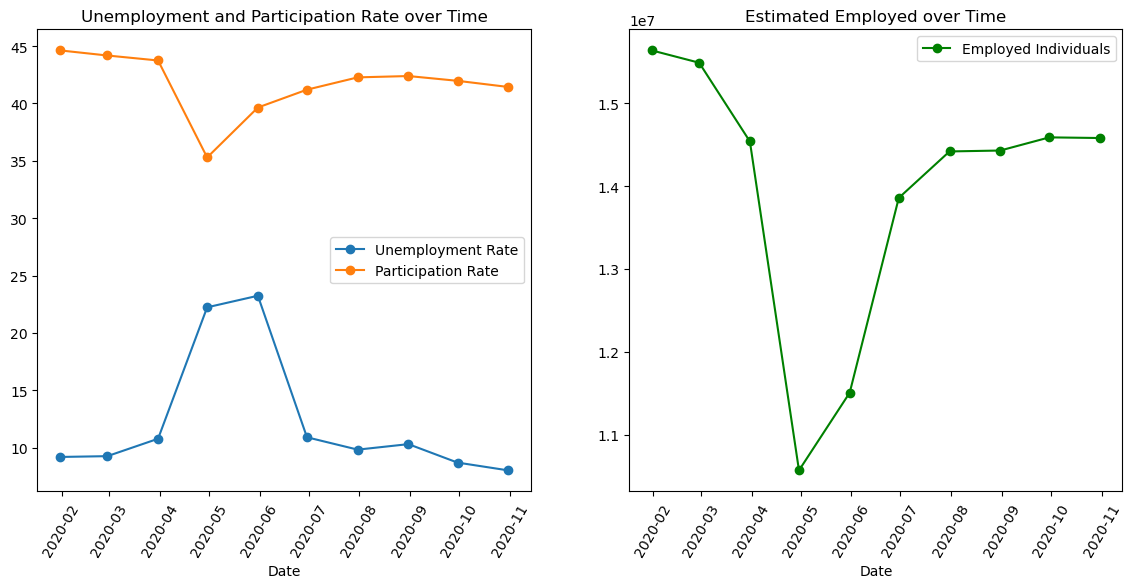

In [51]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
unemp_date = df2.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
plt.plot(unemp_date.index, unemp_date.values, marker='o', label='Unemployment Rate')
active = df2.groupby('Date')['Estimated Labour Participation Rate (%)'].mean()
plt.plot(active.index, active.values, marker='o', label='Participation Rate')
plt.xlabel('Date')
plt.xticks(rotation=60)
plt.title('Unemployment and Participation Rate over Time')
plt.legend()
plt.subplot(1,2,2)
emp_date = df2.groupby('Date')['Estimated Employed'].mean()
plt.plot(emp_date.index, emp_date.values, marker='o', c='g', label='Employed Individuals')
plt.xlabel('Date')
plt.xticks(rotation=60)
plt.title('Estimated Employed over Time')
plt.legend()
plt.show()

**Insights**: 
- We can clearly see through these plots the effect of the lockdown on the features. Between April and July in 2020, the unemployment rate in India jumped from 10% up to ~25% on average.
- In the post-lockdown period, we can see that the unemployment rate went back to normal.
- On the other hand, as expected, the participation rate went down from 45% to 35%. In the post-lockdown period, it increased gradually but didn't went as up as it was before lockdown.
- Similarly, the estimated number of employed individuals dipped straight during lockdown and increased gradually after.
___

10. This visualization shows the variation of unemployment rate (left), and participation rate (right) by area.

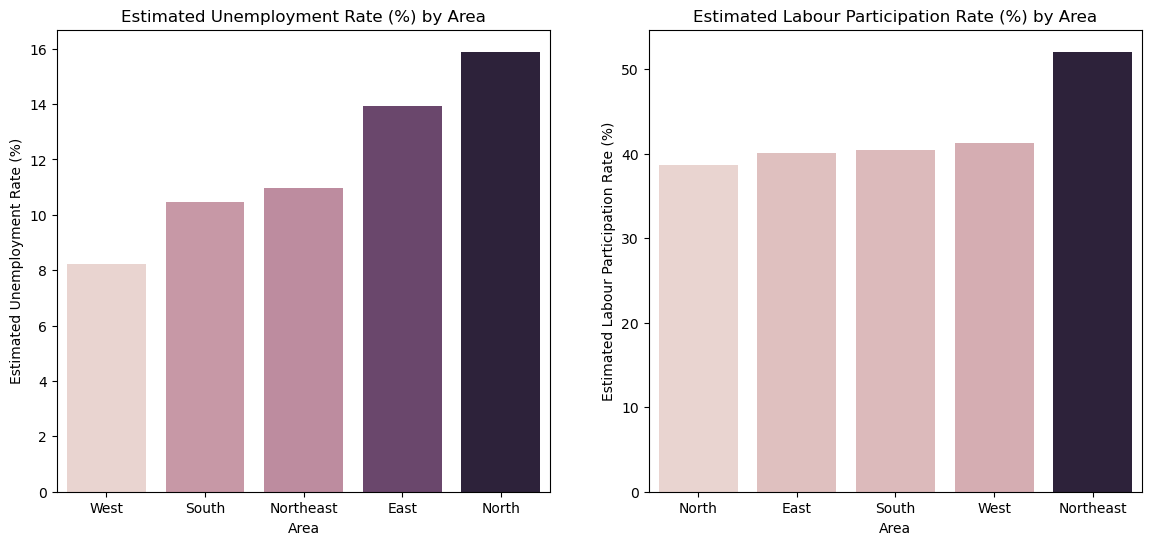

In [54]:
plt.figure(figsize=(14,6))
cols = ['Estimated Unemployment Rate (%)','Estimated Labour Participation Rate (%)']
plt.subplot(1,2,1)
ordered_stats = df2.groupby('Area')[cols[0]].mean().sort_values().reset_index()
sns.barplot(data=ordered_stats, x='Area', y=cols[0], hue=cols[0], errorbar=None)
plt.title('Estimated Unemployment Rate (%) by Area')
plt.legend([], [], frameon=False)
plt.subplot(1,2,2)
ordered_stats = df2.groupby('Area')[cols[1]].mean().sort_values().reset_index()
sns.barplot(data=ordered_stats, x='Area', y=cols[1], hue=cols[1], errorbar=None)
plt.title('Estimated Labour Participation Rate (%) by Area')
plt.legend([], [], frameon=False)
plt.show()

**Insights**:
- We can see that the **unemployment rate** is the highest in the *North* and *East*.
- The **participation rate** is the lowest in the *North* and *East*.
- This indicates that these two areas suffer the most from unemployment, supported by the low participation rate.
___

11. This circular plot shows the distribution of the unemployment rate by area and region.

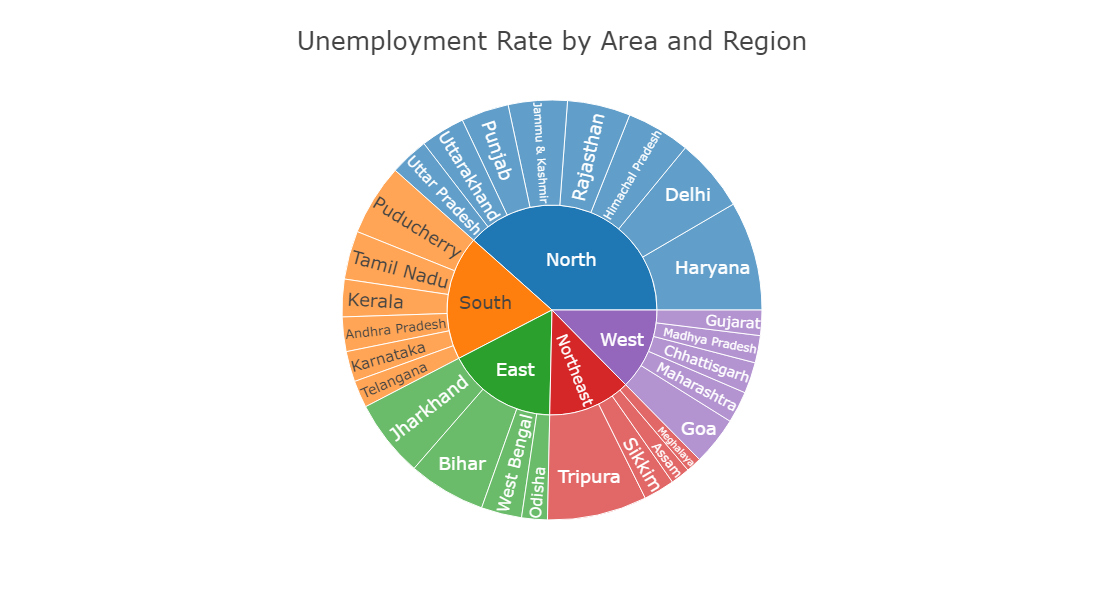

In [57]:
fig = px.sunburst(df2, path=['Area', 'Region'], values='Estimated Unemployment Rate (%)',
                  title='Unemployment Rate by Area and Region', template='presentation', width=600, height=600)
fig.show()

12. This visualization is a map that shows how the unemployment rate varies on the map of India. The bigger the size of the circle, the higher the unemployment.

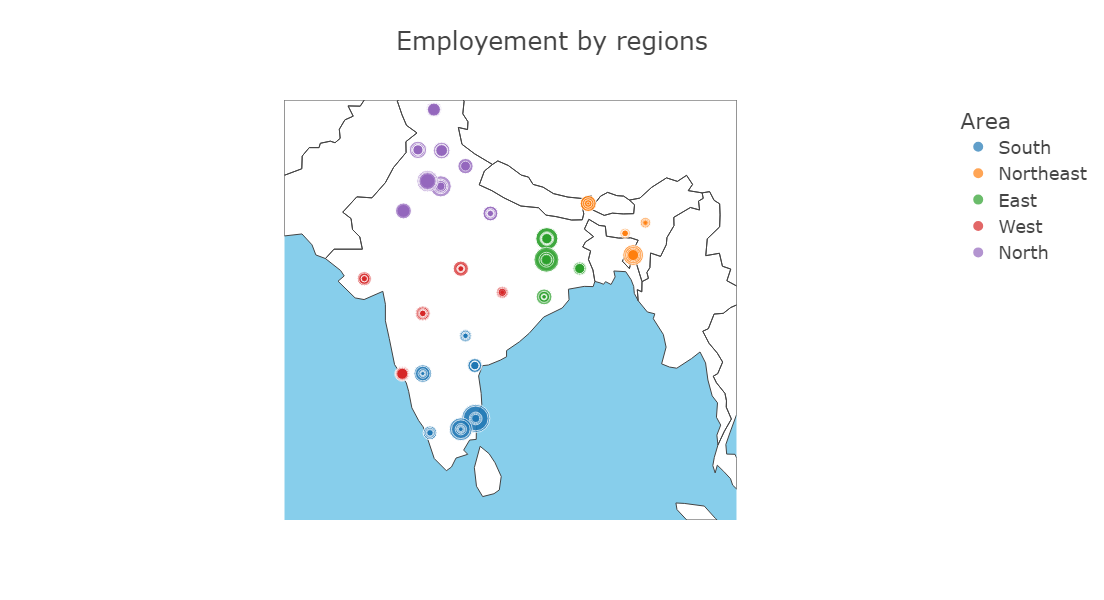

In [59]:
fig = px.scatter_geo(df2, 'latitude', 'longitude', color="Area", hover_name="Region",
                     size="Estimated Unemployment Rate (%)", scope='asia', template='presentation',
                     title='Employement by regions', width=600, height=600)
fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100], oceancolor="skyblue", showocean=True)
fig.show()

### Comparing data before and after lockdown
Here, I will split the data in the second dataset into 2 smaller subsets: data before lockdown and during lockdown. The aim is to compare the unemployment rate between these periods, and visualize the percentage of change among the different regions. Some regions showed an extreme increase change in unemployment rate, so I will be plot that in a separate plot.

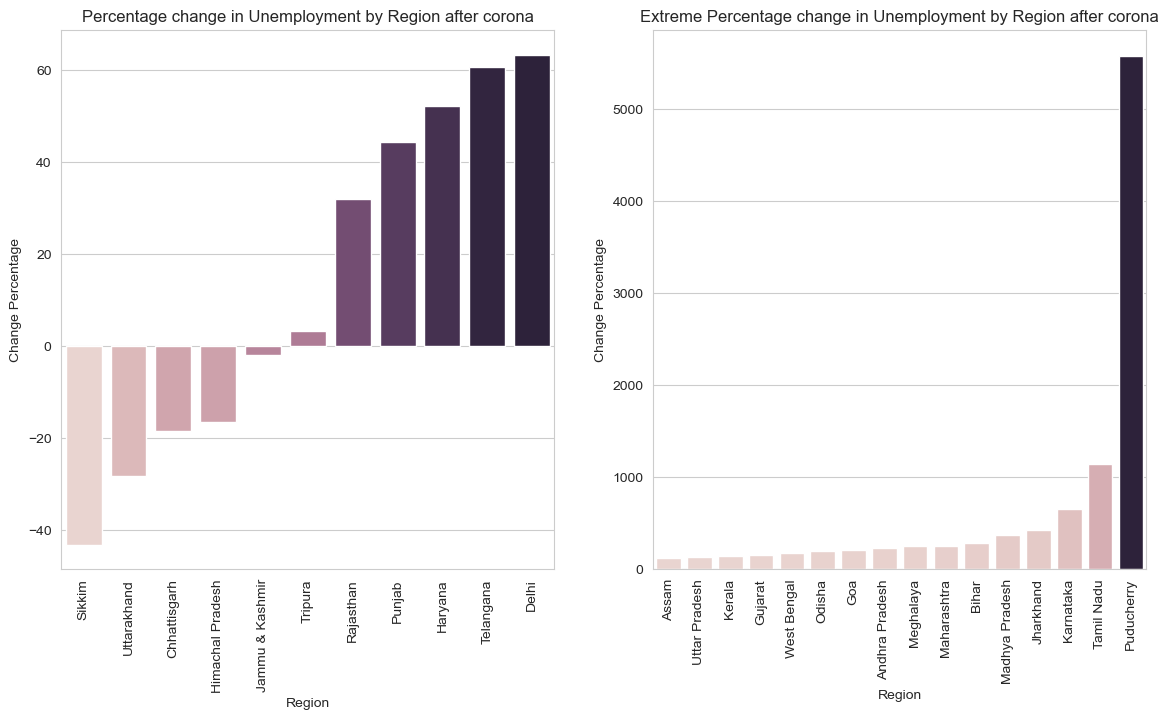

In [61]:
df2['Month'] = df2['Date'].dt.month +1
bf_corona = df2[df2['Month'] <=4]
corona = df2[(df2['Month']>4) & (df2['Month']<7)]
mean_bf_corona = bf_corona.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()
mean_corona = corona.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

compare = pd.merge(mean_bf_corona, mean_corona, on='Region')
compare.columns = ['Region', 'Unemployment Rate before Corona', 'Unemployment Rate after Corona']
bf = compare['Unemployment Rate before Corona']
af = compare['Unemployment Rate after Corona']
compare['Change Percentage'] = round(((af-bf)/bf)*100,2)
compare = compare.sort_values('Change Percentage')

normal = compare[compare['Change Percentage']<100]
extreme = compare[compare['Change Percentage']>=100]

plt.figure(figsize=(14,7))
sns.set_style('whitegrid')
plt.subplot(1,2,1)
sns.barplot(data=normal, x='Region', y='Change Percentage', hue='Change Percentage', errorbar=None)
plt.title('Percentage change in Unemployment by Region after corona')
plt.legend([], [], frameon=False)
plt.xticks(rotation='vertical')
plt.subplot(1,2,2)
sns.barplot(data=extreme, x='Region', y='Change Percentage', hue='Change Percentage', errorbar=None)
plt.title('Extreme Percentage change in Unemployment by Region after corona')
plt.legend([], [], frameon=False)
plt.xticks(rotation='vertical')
plt.show()

**Insights**:

We can see that the unemployment rate increased in most of the regions, and it even exceeded 100% in 4 regions
Below we will plot the variation of the unemployment rate in Tripura and Punjab (the regions that showed the lowest and highest change).

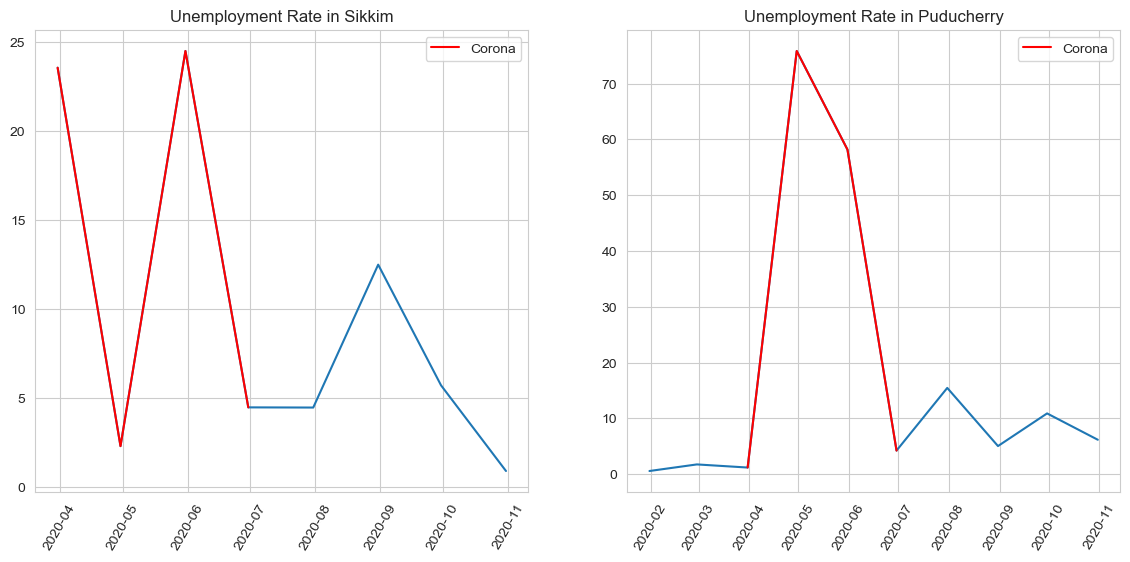

In [63]:
Sikkim = df2[df2['Region']=='Sikkim']
Sikkim_corona = Sikkim[(Sikkim['Month']>3) & (Sikkim['Month']<8)]
Puducherry = df2[df2['Region']=='Puducherry']
Puducherry_corona = Puducherry[(Puducherry['Month']>3) & (Puducherry['Month']<8)]

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(Sikkim['Date'], Sikkim['Estimated Unemployment Rate (%)'])
plt.plot(Sikkim_corona['Date'], Sikkim_corona['Estimated Unemployment Rate (%)'], c='r', label='Corona')
plt.title('Unemployment Rate in Sikkim')
plt.xticks(rotation=60)
plt.legend()

plt.subplot(1,2,2)
plt.plot(Puducherry['Date'], Puducherry['Estimated Unemployment Rate (%)'])
plt.plot(Puducherry_corona['Date'], Puducherry_corona['Estimated Unemployment Rate (%)'], c='r', label='Corona')
plt.title('Unemployment Rate in Puducherry')
plt.xticks(rotation=60)
plt.legend()
plt.show()

- We can see that the there are no data from *Sikkim* before April, which explains the negative percentage of change in unemployment rate.
- Looking at Puducherry, we can see that the unemployment rate before lockdown was nearly zero, and it went as high as 75% during lockdown, which explains the incredibely high percentage in change in Puducherry.